# <b><u> Prediction of Cross-Selling Opportunities in Health Insurance </u></b>

## <b> Description </b>
An insurance company provides health insurance to its customers. To expand their offerings, they aim to predict whether policyholders from the past year would also be interested in purchasing vehicle insurance. Developing this predictive model is essential for optimizing their cross-selling strategies and enhancing customer outreach.

## <b> Objective </b>
Developing a model to predict the likelihood of a customer’s interest in vehicle insurance is crucial for the company. This model will enable the company to tailor its communication strategies, optimize its business model, and increase revenue.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
#reading dataset
df=pd.read_csv('C:/Projects/Health-insurance-cross-sell-prediction-main/health_insurance.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
#Descriptive statistics
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [4]:
#Shape of data
df.shape

(381109, 12)

In [5]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
#checking missing values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* Our dataset have
 no null value.

In [7]:
#Check for duplicated values
display(df.drop_duplicates())

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# Data Preprocessing

# Univariate Analysis

<Axes: xlabel='Response', ylabel='count'>

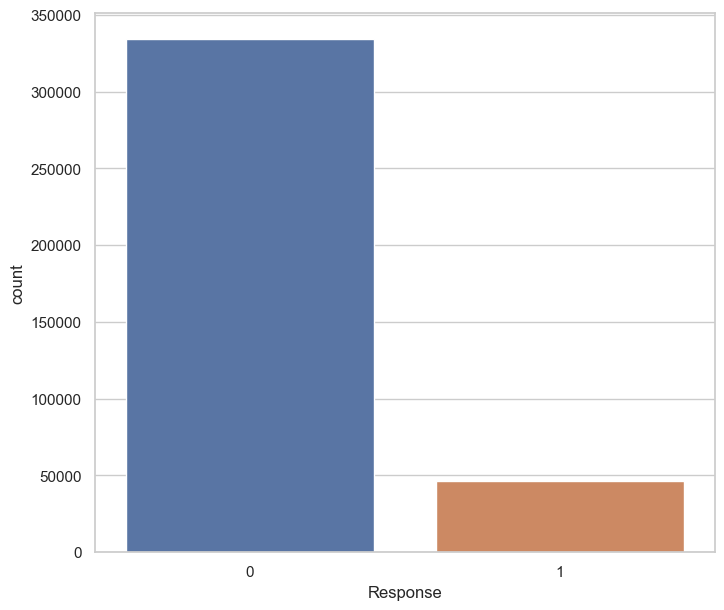

In [9]:
#Dependent variable 'Response'
plt.figure(figsize=(8,7))
sns.set_theme(style='whitegrid')
sns.countplot(x=df['Response'],data=df)

* From above fig we can see that the data is highly imbalanced.

<Axes: xlabel='Age', ylabel='count'>

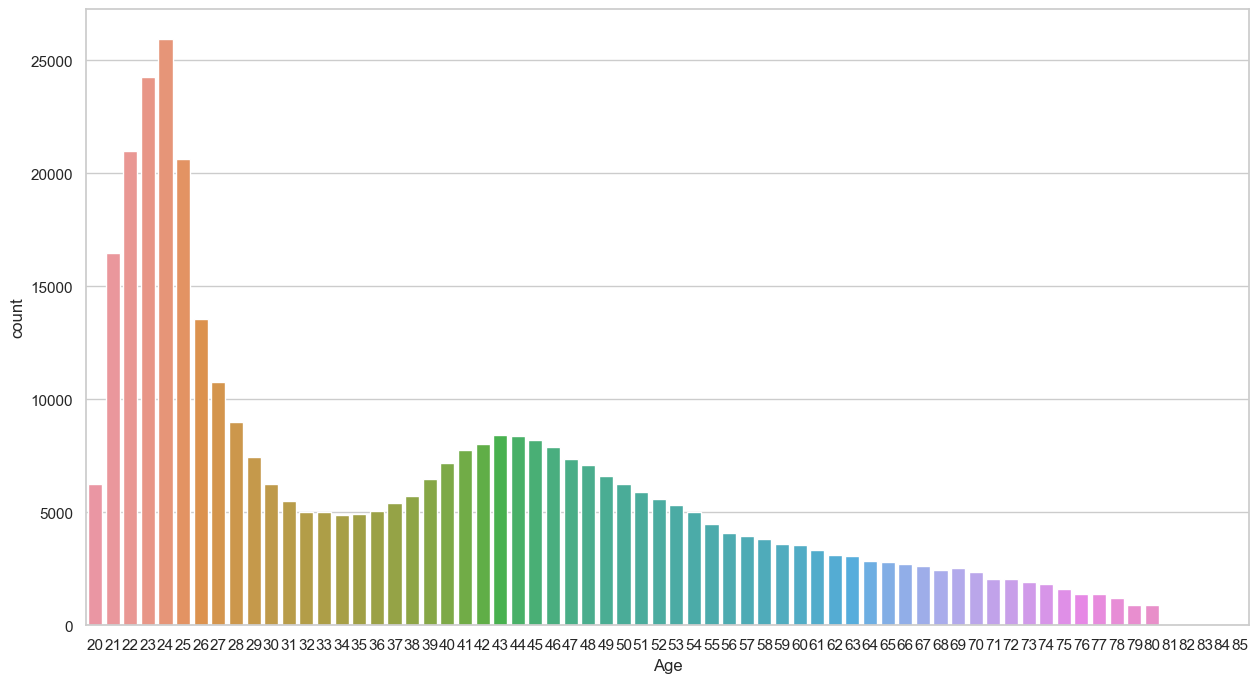

In [10]:
#Distribution of Age 
plt.figure(figsize=(15,8))
sns.countplot(x=df['Age'],data=df)

* From the above distribution of age we can see that most of the customers age is between 21 to 25 years.There are few Customers above the age of 60 years.

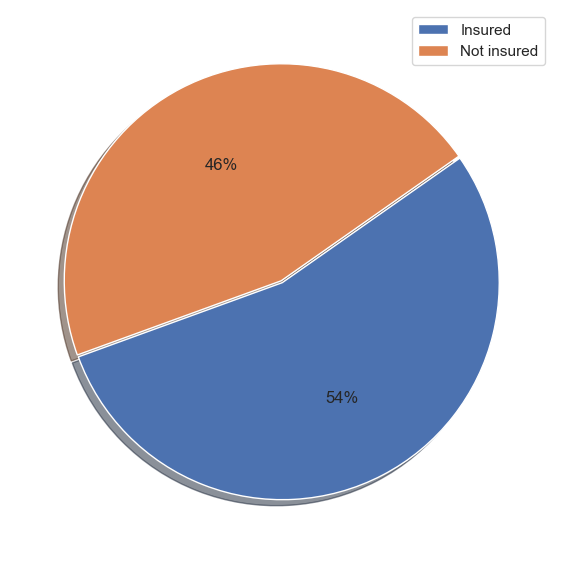

In [11]:

plt.figure(figsize=(7,9))
plt.pie(df['Previously_Insured'].value_counts(), autopct='%.0f%%', shadow=True, startangle=200, explode=[0.01,0])
plt.legend(labels=['Insured','Not insured'])
plt.show()


* 54% customer are previously insured ahe 46% customer are are not insured yet.
* Customer who are not perviosly insured are likely to be inetrested.

C:\Users\samen\AppData\Local\Temp\ipykernel_19488\14887479.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, color='purple')


<Axes: xlabel='Annual_Premium', ylabel='Density'>

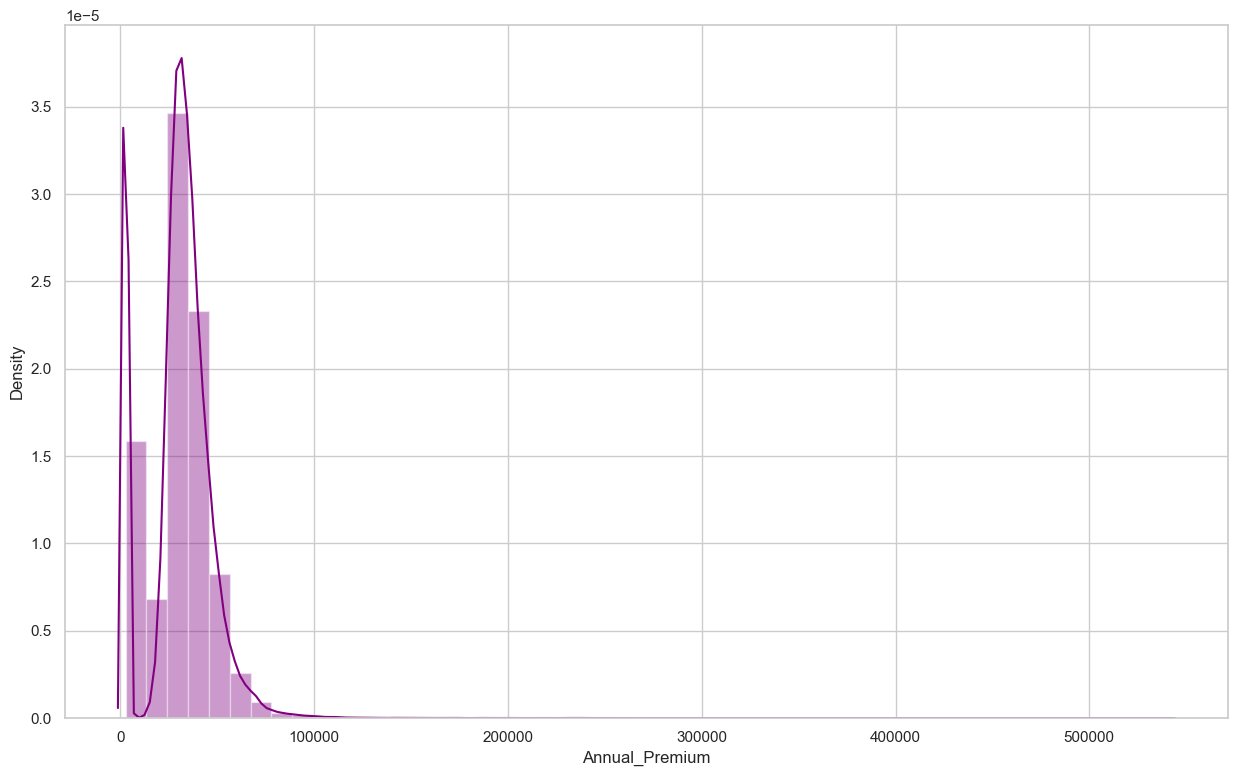

In [12]:
plt.figure(figsize=(15,9))
a=df['Annual_Premium']
sns.distplot(a, color='purple')

* From the distribution plot we can infer that the annual premimum variable is right skewed

<Axes: >

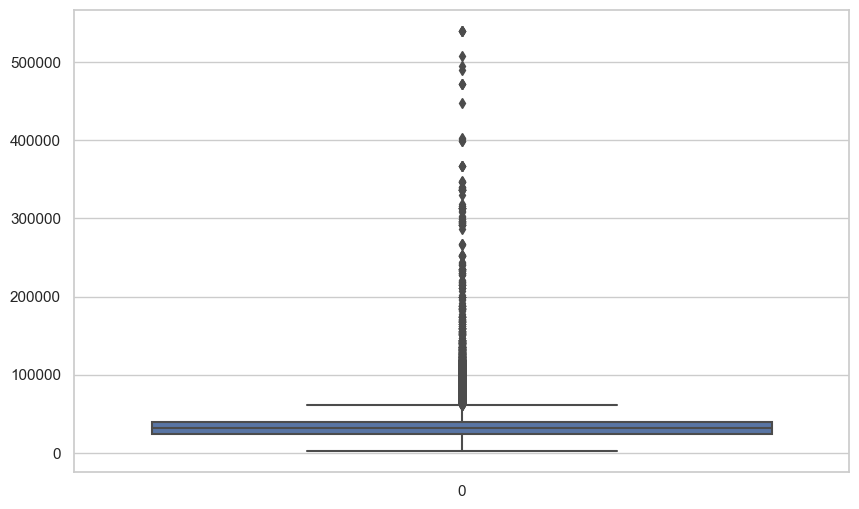

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Annual_Premium'])

*  For the boxplot above we can see that there's a lot of outliers in the annual premium.

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

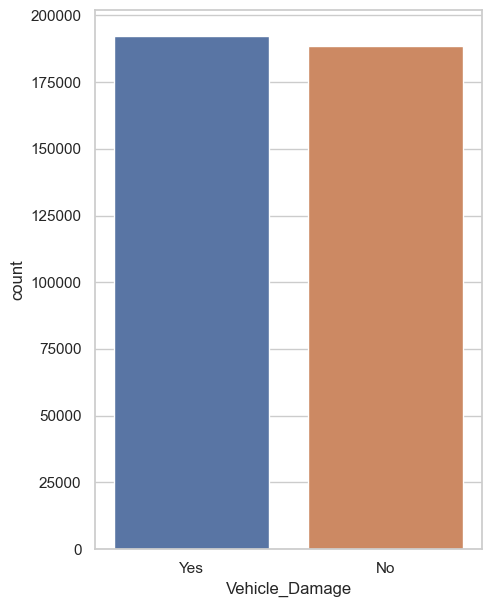

In [14]:
plt.figure(figsize=(5,7))
sns.countplot(x=df['Vehicle_Damage'])

* Customers with Vehicle_Damage are likely to buy insurance

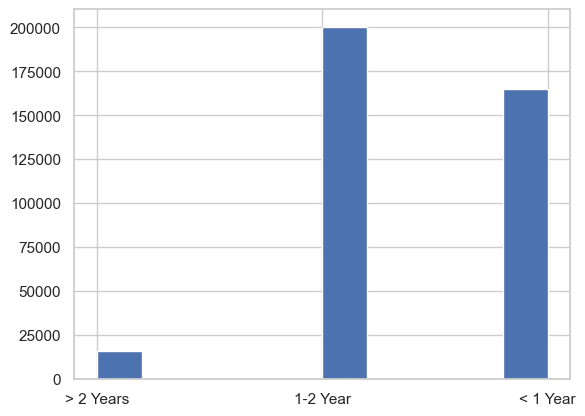

In [15]:
df['Vehicle_Age'].hist();

* From the above plot we can see that most of the people are having vehicle age between 1 or 2 years and very few people are having vehicle age more than 2 years. 

# Bivariate analysis

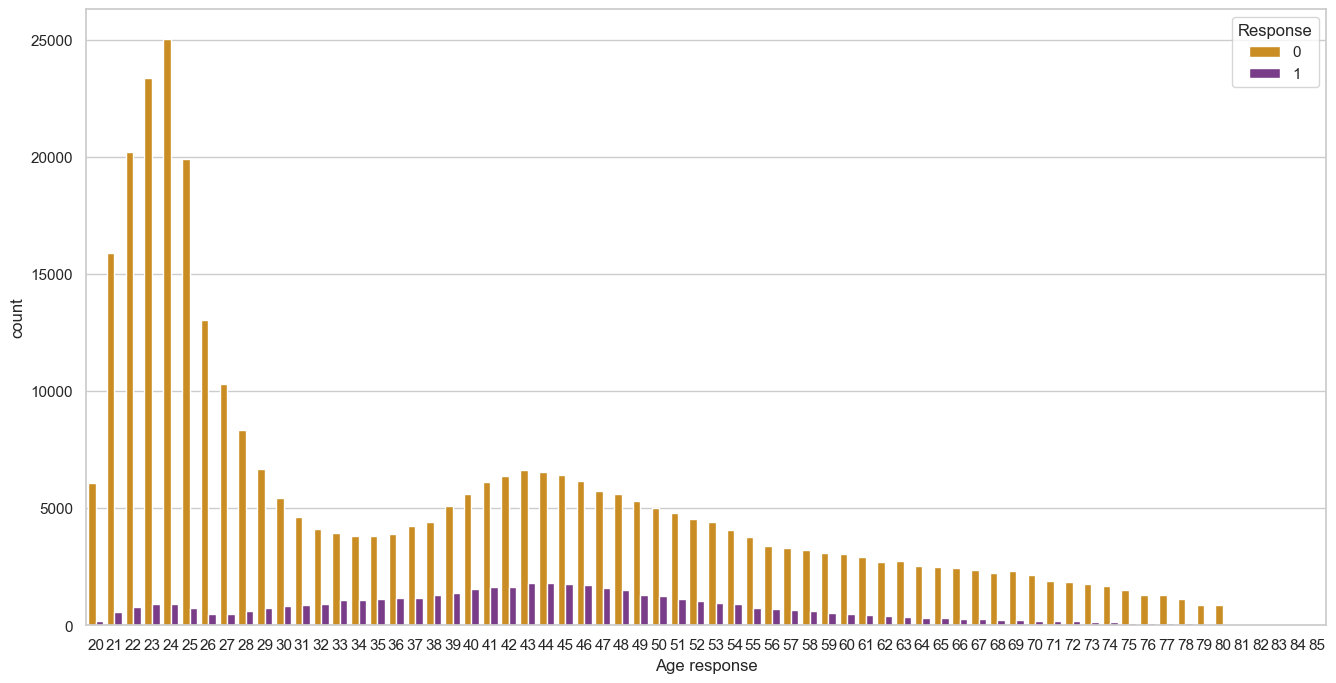

In [16]:
#Age VS Response
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Age',hue='Response', palette='CMRmap_r')
plt.xlabel('Age response')
plt.ylabel('count')
plt.show()

* People ages between from 31 to 50 are more likely to respond. 
*  while Young people below 30 are not interested in vehicle insurance. 


<Axes: xlabel='Gender'>

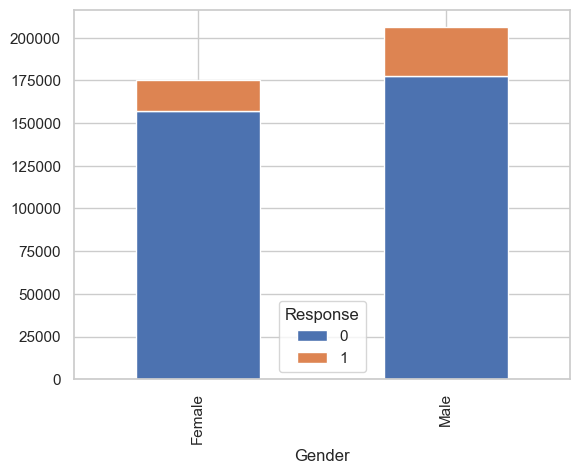

In [17]:
#Gender vs Response
df.groupby(['Gender', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)

* Male category is slightly greater than that of female and chances of buying the insurance is also little high

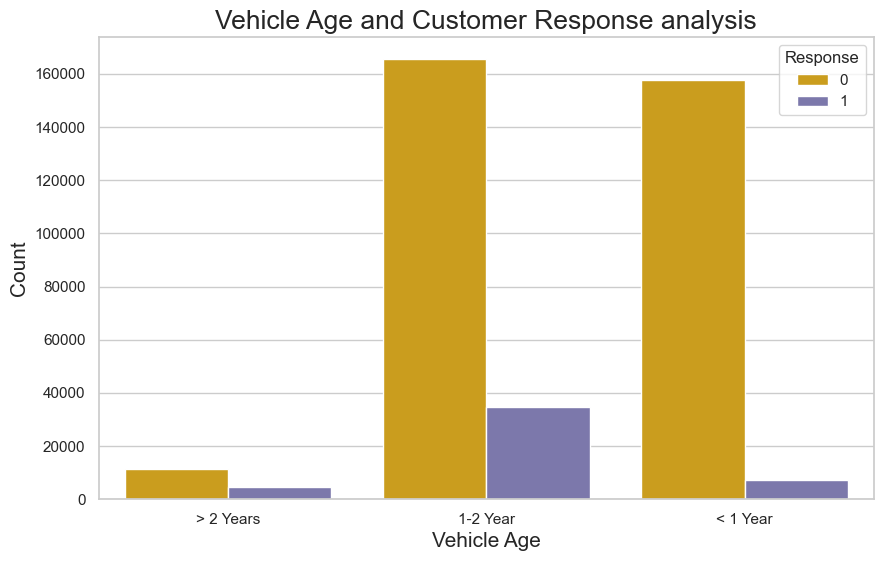

In [18]:
plt.figure(figsize = (10,6) )
sns.countplot(data = df, x = 'Vehicle_Age', hue = 'Response', palette='Dark2_r')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

* Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

* Customers with with Vehicle_Age <1 years have very less chance of buying Insurance

<Axes: xlabel='Response', ylabel='Annual_Premium'>

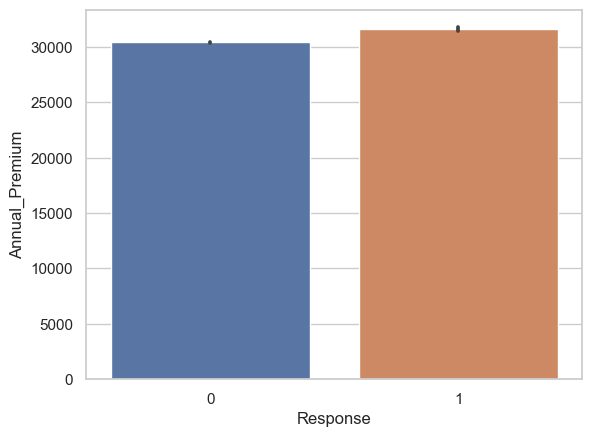

In [19]:
sns.barplot(x = 'Response', y ='Annual_Premium', data = df)

*  People who response have slightly higher annual premium 

C:\Users\samen\AppData\Local\Temp\ipykernel_19488\720771663.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

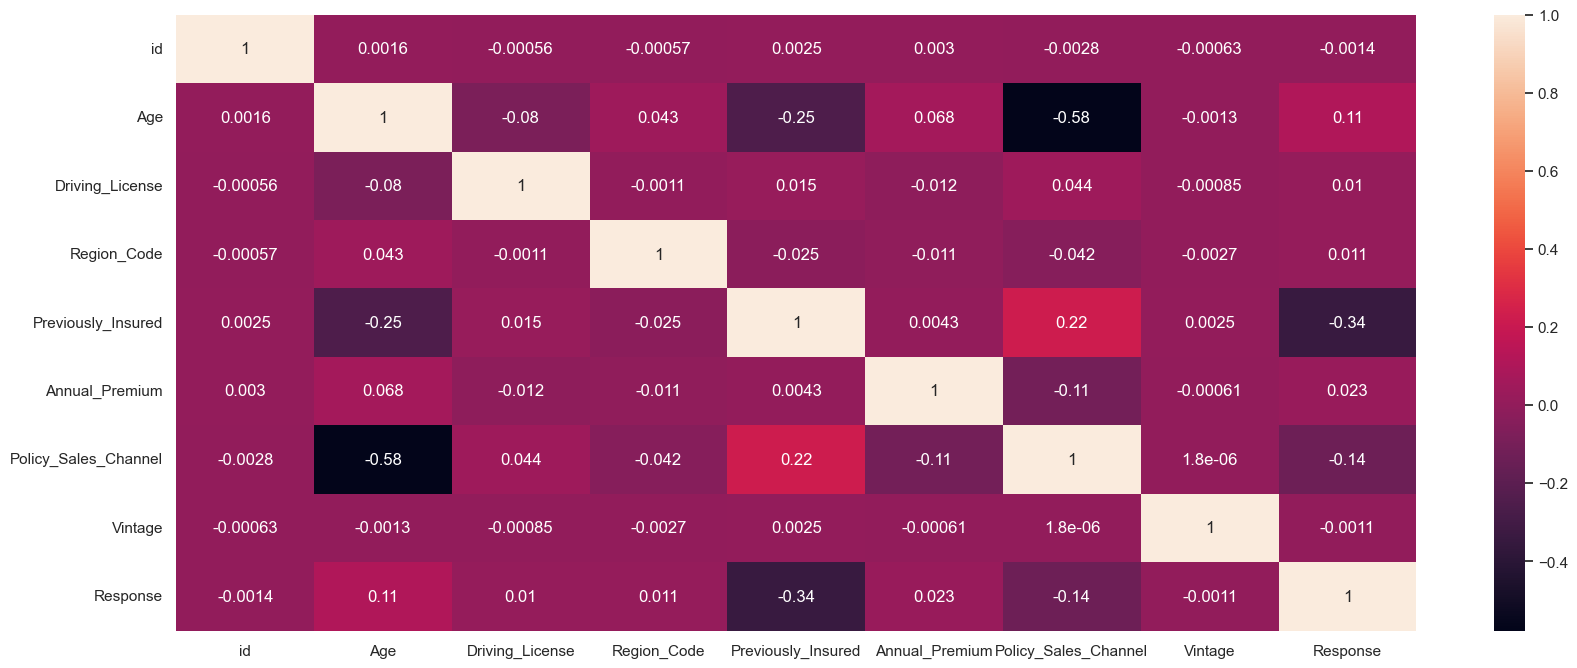

In [20]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

* Target variable is not much affected by Vintage variable. we can drop least correlated variable.

# Encoding Object columns
* changing categorical value to numerical values

In [21]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [22]:
df['Vehicle_Age']= df['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,No,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,No,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,No,27496.0,152.0,39,0


In [23]:
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


# Feature Engineering and Feature Selection

In [24]:
correlation = df.corr()
correlation['Response'].sort_values(ascending = False)[1:]

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

In [25]:
X=df.drop(columns=['id','Driving_License','Policy_Sales_Channel','Vintage','Response'])# independent variable
y = df['Response']# dependent variable

In [26]:
# Fill any numerical NaNs with mode()

fill_mode = lambda col: col.fillna(col.mode())
X = X.apply(fill_mode, axis=0)
df = df.apply(fill_mode, axis=0)

# Model Building

In [27]:
# check for imbalance in data 
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

+* We can clearly see that there is a huge difference between the data set. 
* Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. So solving this issue we use resampling technique.


In [28]:
#Resampling
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))


After Random Over Sampling Of Minor Class Total Samples are : 668798
Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


# Splitting the data in train and test sets

In [29]:
X_train, X_test ,y_train, y_test=  train_test_split(X_new, y_new, random_state=42, test_size=0.3)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((468158, 7), (200640, 7), (468158,), (200640,))

In [30]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Logistic Regression

In [31]:
#Importing Logistic Regression
model= LogisticRegression(random_state=42)
model=model.fit(X_train, y_train)
#Making prediction
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]

**Model** **Evaluation**

In [32]:
# Evaluation
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)

recall_score :  0.976100453713285
precision_score : 0.7071892503658422
f1_score : 0.8201651165221027
accuracy_score : 0.7855811403508772
ROC_AUC Score: 0.8341983171030103


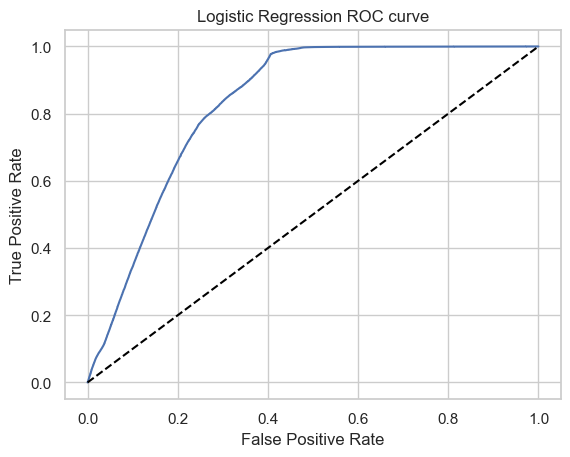

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, prob)

plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# Confusion_matrix

[[59517 40619]
 [ 2402 98102]]


<Axes: >

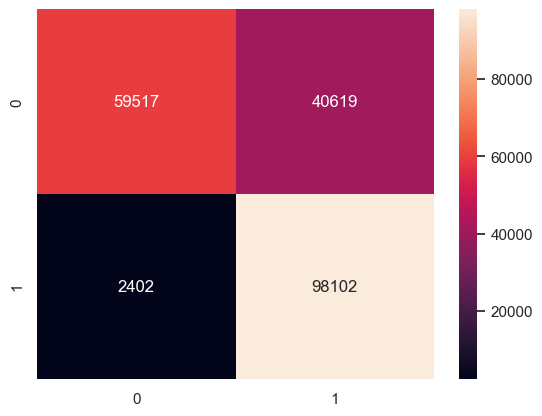

In [34]:
matrix= confusion_matrix(y_test, pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

* From the confusion matrix we see that the model is predicting positive responses but also predicting negative response too.

In [35]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61919
           1       0.98      0.71      0.82    138721

    accuracy                           0.79    200640
   macro avg       0.79      0.83      0.78    200640
weighted avg       0.86      0.79      0.79    200640



# RandomForest Classifier

In [36]:
RF_model= RandomForestClassifier()
RF_model= RF_model.fit(X_train, y_train)
#Making prediction
rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]

**Model Evaluation**

In [37]:
# Evaluation
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)

recall_score :  0.9850453713285043
precision_score : 0.8638906098657056
f1_score : 0.9204985518565525
accuracy_score : 0.9147677432216906
ROC_AUC Score: 0.9232110968227657


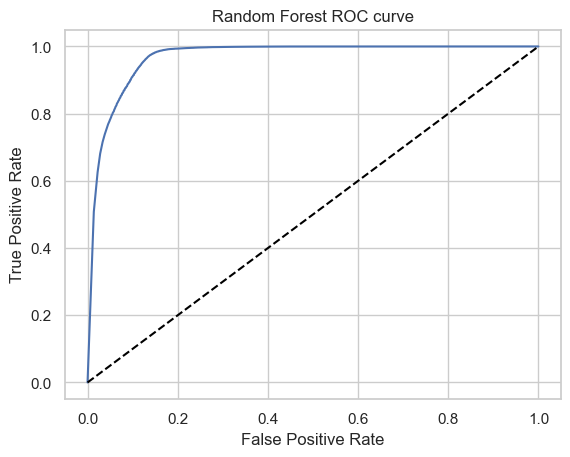

In [38]:
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# Confusion_matrix

[[84538 15598]
 [ 1503 99001]]


<Axes: >

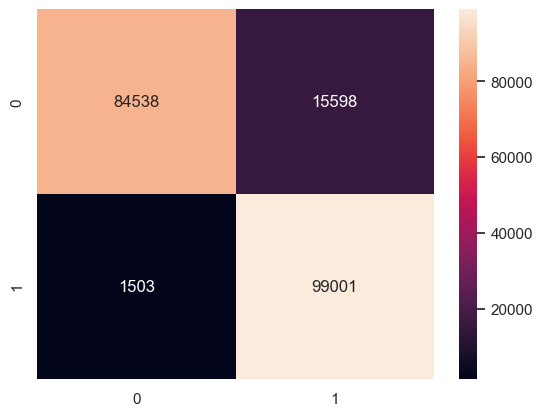

In [39]:
matrix= confusion_matrix(y_test,rf_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

The confusion matrix now shows that the model now is much better with predicting positive responses.



In [40]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91     86041
           1       0.99      0.86      0.92    114599

    accuracy                           0.91    200640
   macro avg       0.91      0.92      0.91    200640
weighted avg       0.92      0.91      0.92    200640



The model performs very well, so we can use it to predict unknown data.

# XGBoost

In [41]:
XG_model= XGBClassifier()
XG_model= XG_model.fit(X_train, y_train)
#Making prediction
XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]

**Model** **Evaluation**

In [42]:
# Evaluation
r_XG= recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG= precision_score(y_test, XG_pred)
print("precision_score :",p_XG)

f1_XG= f1_score(y_test, XG_pred)
print("f1_score :", f1_XG)

A_XG= accuracy_score( y_test, XG_pred)
print("accuracy_score :",A_XG)

acu_XG = roc_auc_score(XG_pred, y_test)
print("ROC_AUC Score:",acu_XG)

recall_score :  0.9365398392103796
precision_score : 0.7444262541422482
f1_score : 0.8295049461323228
accuracy_score : 0.8071521132376396
ROC_AUC Score: 0.8292341111814222


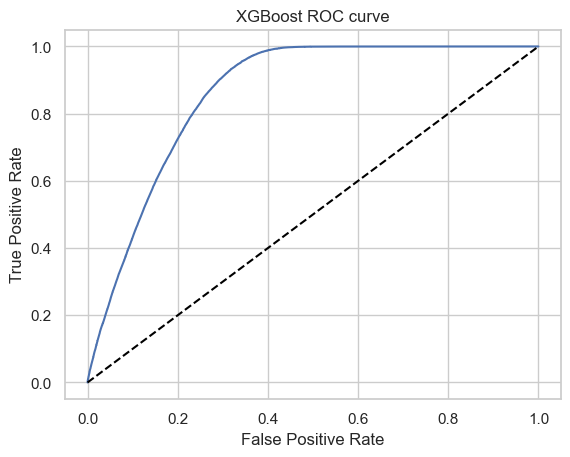

In [43]:
fpr, tpr, _ = roc_curve(y_test, XG_prob)

plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# Confusion_matrix

[[67821 32315]
 [ 6378 94126]]


<Axes: >

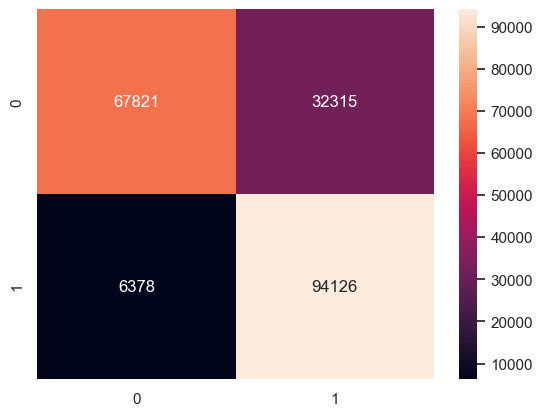

In [44]:
matrix= confusion_matrix(y_test,XG_pred)
print(matrix)
sns.heatmap(matrix ,annot=True, fmt='g')

From the confusion matrix we see that the model is a bit better with predicting positive responses.

In [45]:
print(classification_report(XG_pred, y_test))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78     74199
           1       0.94      0.74      0.83    126441

    accuracy                           0.81    200640
   macro avg       0.81      0.83      0.80    200640
weighted avg       0.84      0.81      0.81    200640



# Comparing  the Model

In [46]:
com= ['Logistic Regression','Randomforest','XGBClassifier']
data={'Accuracy':[A_lgt,A_rf,A_XG],'Recall':[r_lgt,r_rf, r_XG],'Precision':[p_lgt, p_rf, p_XG], 'f1_score':[f1_lgt, f1_rf, f1_XG],'ROC_AUC':[acu_lgt, acu_rf, acu_XG]}
result=pd.DataFrame(data=data, index=com)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic Regression,0.785581,0.976100,0.707189,0.820165,0.834198
Randomforest,0.914768,0.985045,0.863891,0.920499,0.923211
XGBClassifier,0.807152,0.936540,0.744426,0.829505,0.829234


# Conclusion

Starting from loading our dataset, we initially checked for null values and duplicates. Since there were none, no treatment was necessary.

Through Exploratory Data Analysis (EDA), we observed the following:
- Customers in the younger age group are more interested in vehicle insurance.
- Young people below 30 are not interested in vehicle insurance.
- Customers with vehicles older than 2 years are more likely to be interested in vehicle insurance.
- Customers with damaged vehicles are more likely to be interested in vehicle insurance.

Key variables affecting the target variable include Age, Previously_Insured, and Annual_Premium. For feature selection, we applied the Mutual Information technique and found that Previously_Insured is the most important feature with the highest impact on the target variable, with no correlation between them.

We observed that the target variable was highly imbalanced. To address this, we used the Random Over Sample resampling technique. We also applied feature scaling techniques to normalize our data, ensuring all features were on the same scale, making it easier to process by machine learning algorithms.

We then applied various Machine Learning algorithms to predict customer interest in vehicle insurance. The results are as follows:

- **Logistic Regression:** 
  - Accuracy = 78.56%
  - Recall = 97.61%
  - Precision = 70.72%
  - F1 Score = 82.02%
  - ROC_AUC = 83.42%
  
- **Random Forest:** 
  - Accuracy = 91.48%
  - Recall = 98.50%
  - Precision = 86.39%
  - F1 Score = 92.05%
  - ROC_AUC = 92.32%
  
- **XGBClassifier:** 
  - Accuracy = 80.72%
  - Recall = 93.65%
  - Precision = 74.44%
  - F1 Score = 82.95%
  - ROC_AUC = 82.92%

From these results, we can conclude that the Random Forest model performs the best, with the highest accuracy of approximately 91% and an ROC_AUC score of 92%. Therefore, Random Forest is the most effective model compared to the others.
